In [63]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [64]:
#define state
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str



In [65]:
def calculate_bmi(state:BMIState) -> BMIState:
    weight = state['weight_kg']    
    height = state['height_m']  
    bmi = weight /(height **2)
    state['bmi']= round(bmi,2)
    return state

In [66]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category']="underweight"
    else:
         state['category']="overweight"
    
    return state


In [67]:
#define state graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_BMI', calculate_bmi)
graph.add_node('label_BMI', label_bmi)
#add edges to your graph
graph.add_edge(START,'calculate_BMI')   
graph.add_edge('calculate_BMI','label_BMI')   
graph.add_edge('label_BMI',END)

#compile the graph
workflow = graph.compile()
#execute the compiled graph


In [68]:
initial_state = {'weight_kg':80,'height_m':15}
output_state = workflow.invoke(initial_state)
print(output_state)

{'weight_kg': 80, 'height_m': 15, 'bmi': 0.36, 'category': 'underweight'}


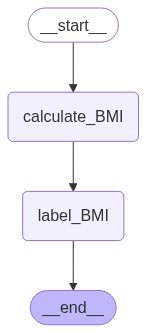

In [69]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())